# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9          |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
# Your code here:
import pandas as pd

data = {'StudentID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
        'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3] }

student_data = pd.DataFrame(data)

Draw a dispersion diagram (scatter plot) for the data.

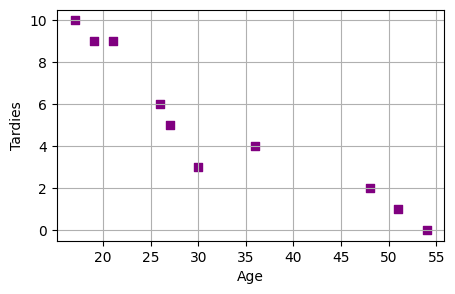

In [3]:
# Your code here:

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,3))

plt.scatter(student_data['Age'], student_data['Tardies'],c='purple',marker='s')

plt.xlabel('Age')
plt.ylabel('Tardies')
plt.grid(True)

plt.show();

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

- Parece que cuanto aumenta la edad los retrasos se reducen

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
# Your response here:

covariance = student_data['Age'].cov(student_data['Tardies'])
correlation = student_data['Age'].corr(student_data['Tardies'])

print('La covarianza es de',covariance,'y la correlacion' ,correlation)

La covarianza es de -45.56666666666666 y la correlacion -0.9391626886887122


- Hay una fuerte relación inversa entre las dos variables, ya que tanto la covarianza y la correlación son negativas. Además la correlación está muy cerca de 1

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

Plot your regression model on your scatter plot.

In [5]:
# Your code here:

from sklearn.model_selection import train_test_split 

from statsmodels.formula.api import ols
import statsmodels.api as sm

X = sm.add_constant(student_data['Age'])

y = student_data.Tardies

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = sm.OLS(y, X).fit()

y_pred = modelo

modelo.summary()

c:\Users\CIara\anaconda3\envs\machine\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Fri, 24 Nov 2023   Prob (F-statistic):           5.57e-05
Time:                        11:01:38   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

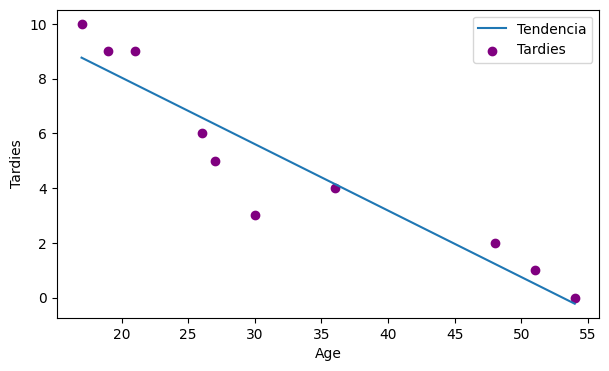

In [6]:
# Your code here.

x=np.linspace(student_data['Age'].min(), student_data['Age'].max(), 50) # pintamos la recta con los datos del max y min de la edad

y=-0.2428*x + 12.8888   # pintamos la línea con la fórmula y = mx+b , que es la pendiente representada con el coeficiente, por x que es la edad mas la coordenada en el origen dado por la constante

plt.figure(figsize=(7, 4))

# la recta
plt.plot(x, y, label='Tendencia')

# datos
plt.scatter(student_data['Age'], student_data['Tardies'], c='purple', label='Tardies')

plt.ylabel('Tardies')
plt.xlabel('Age')
plt.legend()
plt.show();

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

- Según los datos obtenidos, podemos concluir que la edad si tiene relación con los retrasos (F-statistic y p-valor), además gracias al dato de R2, vemos que el modelo explica bien la variabilidad de las variables (0.88)

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [7]:
# Import any libraries you may need & the data:

import statsmodels.api as sm

import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')


data = pd.read_csv('vehicles.csv')
data.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [8]:
# Your response here. 

X = data[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]

y = data['CO2 Emission Grams/Mile']


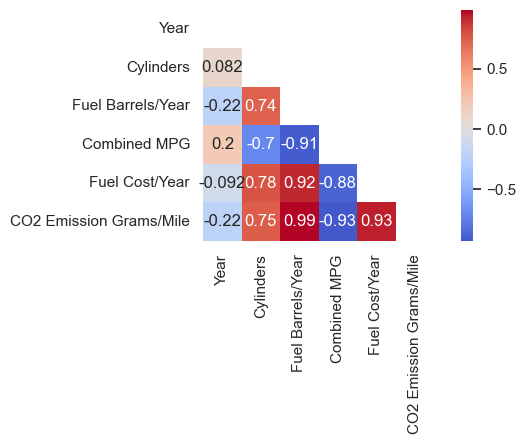

In [50]:
estudio = data[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year','CO2 Emission Grams/Mile']]

plt.figure(figsize=(7,3))  

sns.set(style='white')  

mask=np.triu(np.ones_like(estudio.corr(), dtype=bool))

sns.heatmap(estudio.corr(),    
           mask=mask,
          cmap='coolwarm',
          center=0,
          square=True,
          annot=True);

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [10]:
from sklearn.model_selection import train_test_split as tts   


X_train, X_test, y_train, y_test = tts(X, y,
                                       train_size=0.8,  
                                       test_size=0.2,    
                                       random_state=42   
                                      )

In [11]:
from sklearn.ensemble import RandomForestRegressor as RFR  

rfr=RFR()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [12]:
rfr.predict(X_test)

array([341.80769231, 522.76470588, 423.19047619, ..., 467.73684211,
       467.73684211, 592.46666667])

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

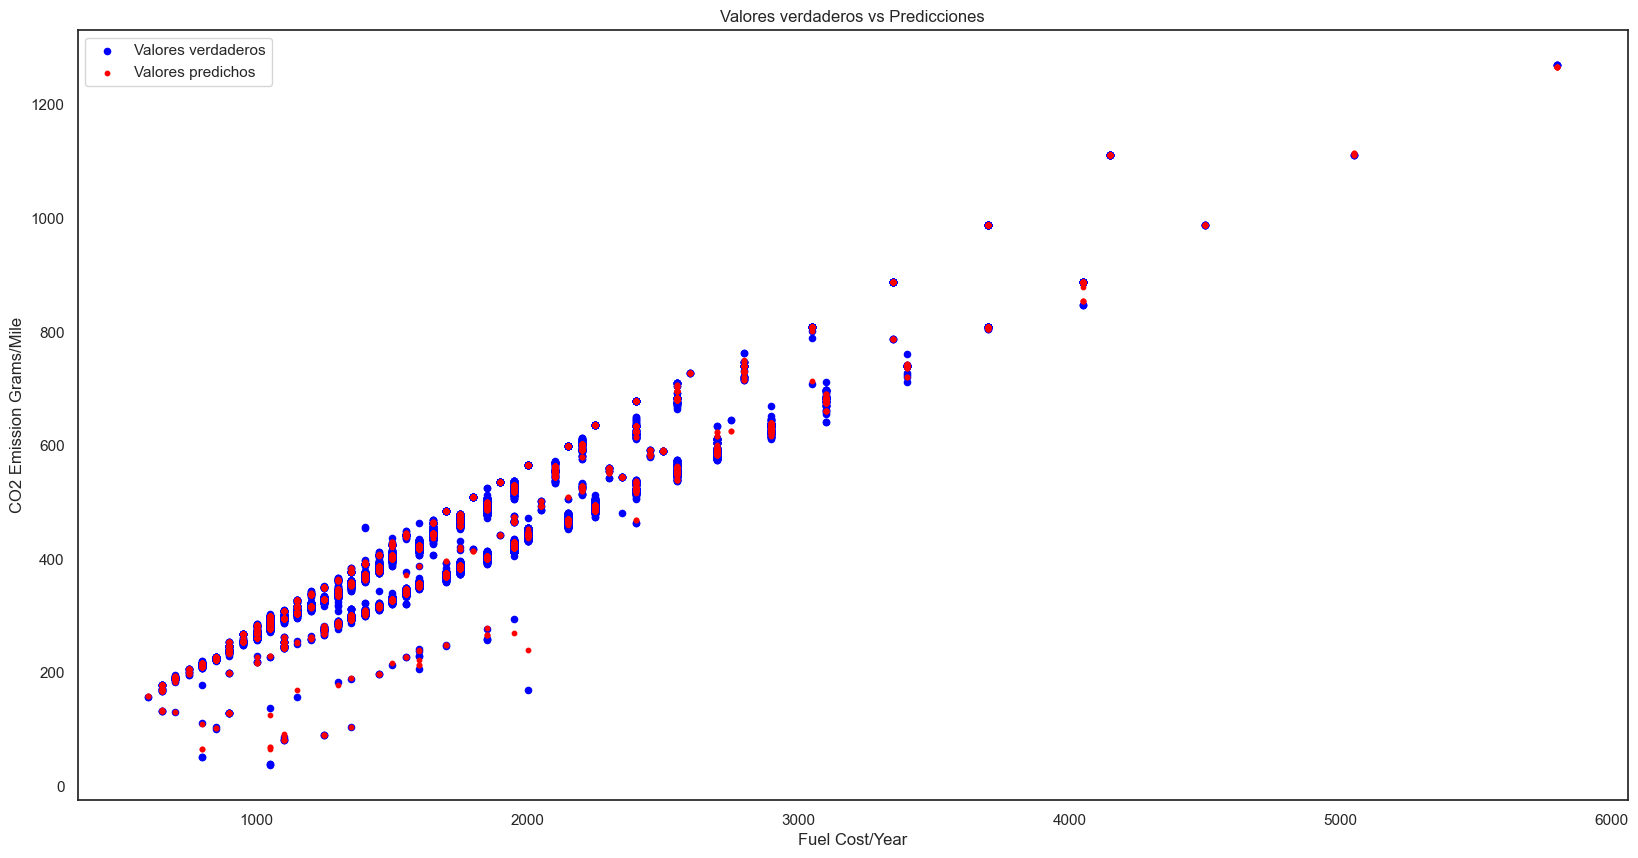

In [97]:
#quiero ver los valores presichos frente a los reales 

y_pred = rfr.predict(X)

plt.figure(figsize=(20, 10))

plt.scatter(data['Fuel Cost/Year'],data['CO2 Emission Grams/Mile'], color='blue',s=20, label='Valores verdaderos')
plt.scatter(data['Fuel Cost/Year'],y_pred, color='red',s=10,alpha=1, label='Valores predichos')

plt.xlabel('Fuel Cost/Year')
plt.ylabel('CO2 Emission Grams/Mile')
plt.title('Valores verdaderos vs Predicciones')
plt.legend() 
plt.show();

In [102]:
# RFR no tiene summary pero puedo ver los valores por partes.

y_pred = rfr.predict(X_test)

from sklearn import metrics

r2 = rfr.score(X_test, y_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Los valores de mi modelo son R2:',r2,' ,MAE:',mae,' ,RMSE:',rmse)
print('Los valores de las variables son:',dict(zip(X.columns,rfr.feature_importances_)))

Los valores de mi modelo son R2: 0.9993147136007013  ,MAE: 0.8622109397003482  ,RMSE: 3.109175027143822
Los valores de las variables son: {'Year': 0.0001332789504950363, 'Cylinders': 7.330168757934689e-05, 'Fuel Barrels/Year': 0.8403540635194486, 'Combined MPG': 0.15873244390108046, 'Fuel Cost/Year': 0.0007069119413965637}


Según los datos obtenidos podemos determinar que el modelo puede explicar aproximadamente el 99.93% de la variabilidad en los datos (`R2`) lo cual es excelente, las predicciones se desvían en 0.86 unidades del valor verdadero (`MAE`) y las predicciones del modelo se desvían aproximadamente 3.11 unidades del valor verdadero (`RMSE`), teniendo en cuenta que estamos hablando de Gr/millas y que sus unidades están superando las decenas, la desviación es muy aceptable.

Respecto al valor de las variables:

- ‘Year’ contribuye con aproximadamente el 0.0133% a la importancia total en las predicciones del modelo.
- ‘Cylinders’ contribuye con aproximadamente el 0.0073% a la importancia total en las predicciones del modelo.
- Fuel Barrels/Year’ es la más importante y contribuye con aproximadamente el 84.03% a la importancia total en las predicciones del modelo.
- ‘Combined MPG’ contribuye con aproximadamente el 15.87% a la importancia total en las predicciones del modelo.
- ‘Fuel Cost/Year’ contribuye con aproximadamente el 0.0707% a la importancia total en las predicciones del modelo.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [14]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [15]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [16]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [17]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [18]:
# Your response here. 